In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [2]:
# pls note that dataset doest not have any header 
df = pd.read_csv("glass.txt",sep=',',header=None)

# add columns name as defined in attributes information in 
# glass data set at https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names
df.columns=["IDNum","RefractiveIndex", "Sodium","Magnesium","Aluminum","Silicon","Potassium","Calcium","Barium","Iron","GlassType"]
df.shape

(214, 11)

In [3]:
# print 10 random rows from the data set
df.sample(10)

,IDNum,RefractiveIndex,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,GlassType
49,50,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.0,0.00,1
121,122,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.0,0.21,2
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
192,193,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09,7
76,77,1.51645,13.44,3.61,1.54,72.39,0.66,8.03,0.0,0.00,2
37,38,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.0,0.00,1
113,114,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.0,0.14,2
18,19,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.0,0.00,1
56,57,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1
95,96,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.0,0.00,2


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [4]:
df.isnull().sum()

IDNum              0
RefractiveIndex    0
Sodium             0
Magnesium          0
Aluminum           0
Silicon            0
Potassium          0
Calcium            0
Barium             0
Iron               0
GlassType          0
dtype: int64

In [5]:
df.isna().sum()

IDNum              0
RefractiveIndex    0
Sodium             0
Magnesium          0
Aluminum           0
Silicon            0
Potassium          0
Calcium            0
Barium             0
Iron               0
GlassType          0
dtype: int64

In [6]:
# Ans: There is no missing values in the data set

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


In [7]:
# Create a separate dataframe consisting only of the features i.e independent attributes
# GlassType is outcome and ID columns has nothing to do with model attributes so drop it
df_feature = df.drop(labels=["IDNum","GlassType"], axis = 1)
df_feature.head()

,RefractiveIndex,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\pandas\plotting\_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


RefractiveIndex       AxesSubplot(0.125,0.125;0.0731132x0.755)
Sodium             AxesSubplot(0.212736,0.125;0.0731132x0.755)
Magnesium          AxesSubplot(0.300472,0.125;0.0731132x0.755)
Aluminum           AxesSubplot(0.388208,0.125;0.0731132x0.755)
Silicon            AxesSubplot(0.475943,0.125;0.0731132x0.755)
Potassium          AxesSubplot(0.563679,0.125;0.0731132x0.755)
Calcium            AxesSubplot(0.651415,0.125;0.0731132x0.755)
Barium             AxesSubplot(0.739151,0.125;0.0731132x0.755)
Iron               AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

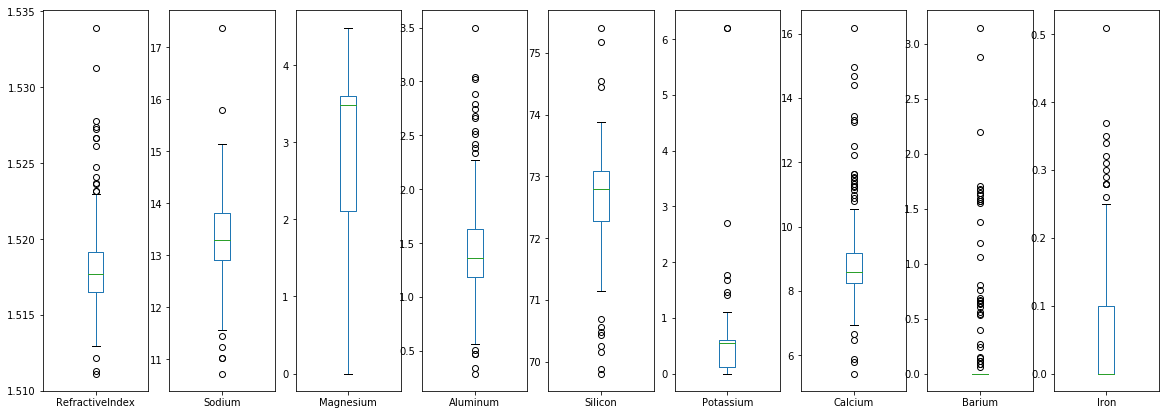

In [8]:
# create box plots for independent features
fig, ax = plt.subplots(figsize=(20,7))
df_feature.plot(kind="box",subplots = True, ax=ax)

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [9]:
# observe variance
df_feature.apply("var")

RefractiveIndex    0.000009
Sodium             0.666841
Magnesium          2.080540
Aluminum           0.249270
Silicon            0.599921
Potassium          0.425354
Calcium            2.025366
Barium             0.247227
Iron               0.009494
dtype: float64

In [10]:
# RefractiveIndex and Iron having almost zero variance(variance < 0.1).. so dropping it
df_feature_final = df_feature.drop(labels=["RefractiveIndex","Iron"],axis=1)
df_feature_final.head()

,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0


## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

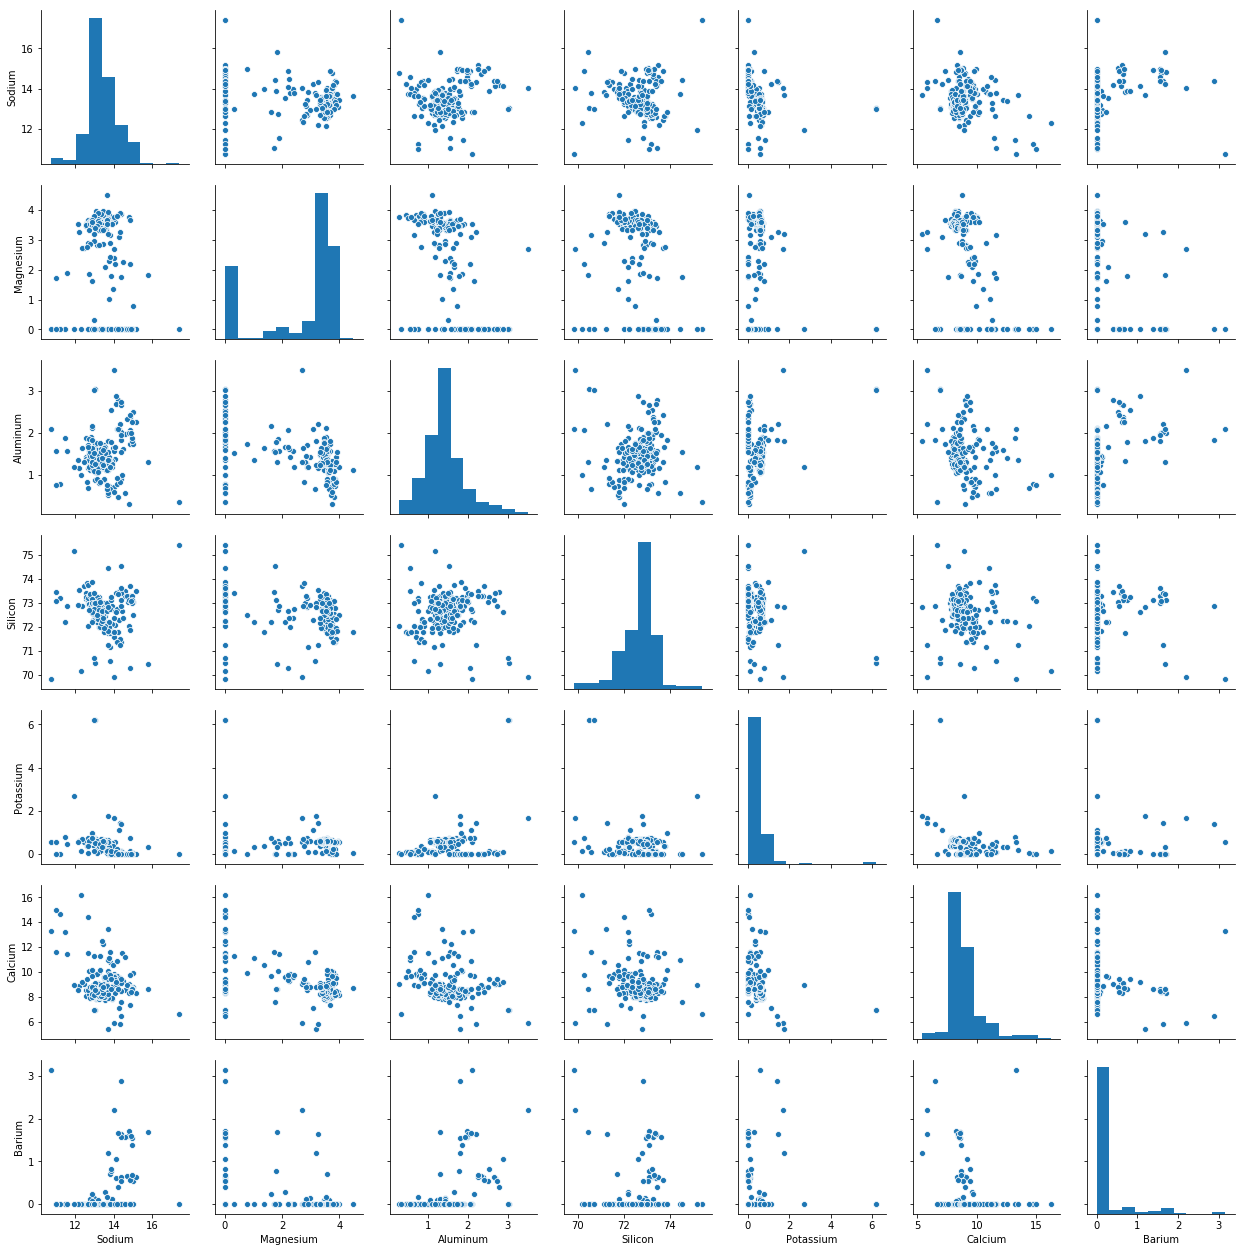

In [11]:
sns.pairplot(df_feature_final)

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [12]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
df_feature_z = df_feature_final.apply(zscore)  # convert all attributes to Z scale 
df_feature_z.describe()

,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01
25%,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01
50%,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01
75%,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01
max,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00


In [13]:
# Capture the outcom values from the 'GlassType' column into a pandas series akin to array 
df_labels = df["GlassType"]

In [14]:
# store the normalized features data into np array 
X = np.array(df_feature_z)
X.shape

(214, 7)

In [15]:
# store the bc_labels data into a separate np array
y = np.array(df_labels)
y.shape

(214,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [17]:
# Call Nearest Neighbour algorithm
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
y_predict = KNN.predict(X_test) # For every test data point, predict it's outcome
K3_score = accuracy_score(y_test, y_predict) # get the accuracy score 

In [19]:
# Call Nearest Neighbour algorithm
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_test) # For every test data point, predict it's outcome
K6_score = accuracy_score(y_test, y_predict) # get the accuracy score 

In [20]:
# Call Nearest Neighbour algorithm
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_test) # For every test data point, predict it's outcome
K9_score = accuracy_score(y_test, y_predict) # get the accuracy score 

In [21]:
print("K3_score: " + str(K3_score))
print("K6_score: " + str(K6_score))
print("K9_score: " + str(K9_score))

K3_score: 0.7692307692307693
K6_score: 0.7076923076923077
K9_score: 0.7076923076923077


## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [22]:
# creating odd list of K for KNN
myList = [1,3,5,7,9,11,13,15,17,19]

# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean()) # take mean for all 10 fold results
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]  # (MSE) = 1 - Test accuracy score
best_k = k_neighbors[MSE.index(min(MSE))]

# print all MSE for K = 1,3,..19
print("MSE : " + str(MSE))
print("\nK_neighbors : " + str(k_neighbors))
print ("\nThe optimal number of neighbors is " +  str(best_k) + " with lowest MSE = " + str(min(MSE)))

MSE : [0.3483480770437293, 0.35324863542254836, 0.3141156910722128, 0.35700326243804503, 0.353285965242487, 0.3525745027918942, 0.35692232887885056, 0.3614677834243052, 0.35591222786874965, 0.3550624254972081]

K_neighbors : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

The optimal number of neighbors is 5 with lowest MSE = 0.3141156910722128


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

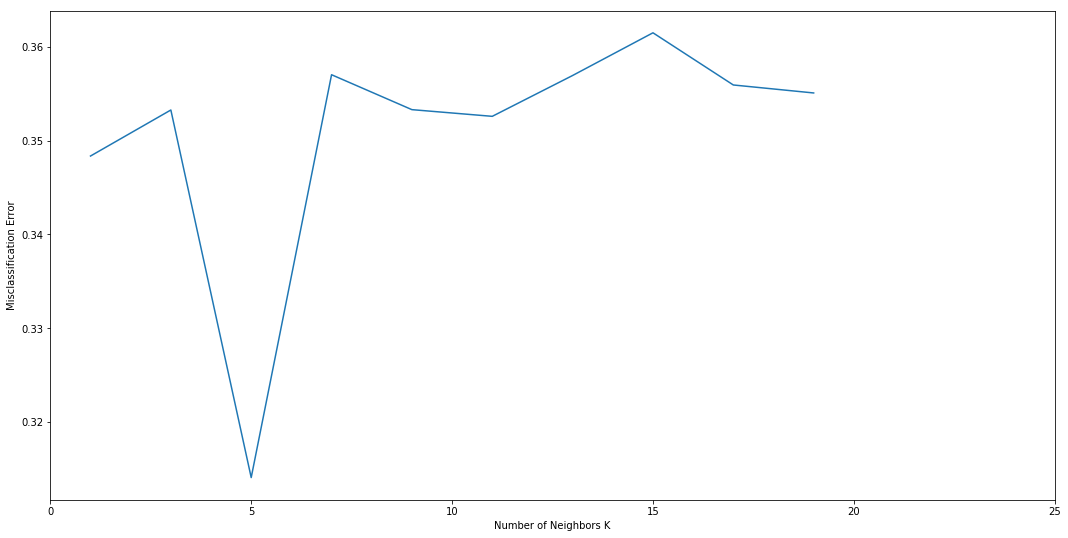

In [23]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)

# plot misclassification error vs k
plt.plot(k_neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()